# Case Study

## Importing libraries

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 400)

import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV




# magic word for producing visualizations in notebook
%matplotlib inline

## Get to Know the Data
There are four data files associated with this Case Study




In [2]:
dataset1 = pd.read_csv('Airlift - case study - data set - Data set 1.csv')
dataset2 = pd.read_csv('Airlift - case study - data set - Data set 2.csv')
dataset3 = pd.read_csv('Airlift - case study - data set - Data set 3.csv')
dataset4 = pd.read_csv('Airlift - case study - data set - Data set 4.csv')

In [4]:
dataset1.head()


,date,ord_type,orders
0,6/27/2021,Repeat,8212
1,6/26/2021,Repeat,7631
2,6/25/2021,Repeat,7251
3,6/24/2021,Repeat,7352
4,6/23/2021,Repeat,7644


In [11]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      176 non-null    object
 1   ord_type  176 non-null    object
 2   orders    176 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ KB


In [5]:
dataset2.head()

,id,warehouse_id,product_id,hours_out_of_stock,daily_sales_adj,selling_price,day,city
0,2408059,1,9,11.765823,5.657077,60.0,4/1/2021,Lahore
1,2454707,1,10,9.660333,11.868269,20.0,4/1/2021,Lahore
2,2482569,1,13,0.209807,9.000000,111.0,4/1/2021,Lahore
3,2222342,1,17,14.000000,1.997337,159.0,4/1/2021,Lahore
4,2441527,1,24,11.766224,0.714286,580.0,4/1/2021,Lahore


In [8]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260504 entries, 0 to 260503
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  260504 non-null  int64  
 1   warehouse_id        260504 non-null  int64  
 2   product_id          260504 non-null  int64  
 3   hours_out_of_stock  260504 non-null  float64
 4   daily_sales_adj     204399 non-null  float64
 5   selling_price       260504 non-null  float64
 6   day                 260504 non-null  object 
 7   city                260504 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 15.9+ MB


In [6]:
dataset3.head()

,date_1,avg,stage
0,11/3/2020,7.847116,commute_time
1,11/3/2020,6.313964,dispatch_time
2,11/3/2020,1.380118,packing_queue_time
3,11/3/2020,10.275065,packing_time
4,11/3/2020,1.335344,picking_queue_time


In [10]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date_1  1428 non-null   object 
 1   avg     1428 non-null   float64
 2   stage   1428 non-null   object 
dtypes: float64(1), object(2)
memory usage: 33.6+ KB


In [9]:
dataset4.head()

,created_at,order_id,warehouse_id,complaint_reason_id,complaint_reason_title,complaint_sub_reason_id,complaint_sub_reason_title,product_id,product_name,is_centralized,supplier,description,resolved_action
0,1/1/21 5:43,NaN,NaN,5.0,Payment,7.0,Credits were not uploaded,NaN,NaN,NaN,NaN,Points are not appering in my account,call
1,1/1/21 8:49,NaN,NaN,4.0,Technical,8.0,App is not working,NaN,NaN,NaN,NaN,order ho hi nhai RHA address likny my bad agy ...,call
2,1/1/21 10:03,NaN,NaN,4.0,Technical,18.0,Other,NaN,NaN,NaN,NaN,What ever item I'm selecting to buy eith it's ...,call
3,1/1/21 10:04,NaN,NaN,4.0,Technical,18.0,Other,NaN,NaN,NaN,NaN,Y'all take forever to Restock.,call
4,1/1/21 11:13,NaN,NaN,5.0,Payment,7.0,Credits were not uploaded,NaN,NaN,NaN,NaN,NaN,call


In [11]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95393 entries, 0 to 95392
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_at                  95393 non-null  object 
 1   order_id                    76812 non-null  float64
 2   warehouse_id                76812 non-null  float64
 3   complaint_reason_id         80867 non-null  float64
 4   complaint_reason_title      80867 non-null  object 
 5   complaint_sub_reason_id     80185 non-null  float64
 6   complaint_sub_reason_title  80185 non-null  object 
 7   product_id                  35931 non-null  float64
 8   product_name                35931 non-null  object 
 9   is_centralized              32323 non-null  object 
 10  supplier                    35400 non-null  object 
 11  description                 72336 non-null  object 
 12  resolved_action             95393 non-null  object 
dtypes: float64(5), object(8)
memory

In [15]:
# columns with missing values
missing_data = dataset1.isnull().sum()[dataset1.isnull().sum() !=0]

total_rows = dataset1.shape[0]
missing_dict = {'Missing_Count': missing_data.values, 
                'Percentage': np.round(missing_data.values*100/(total_rows),2)}

dataset1_missing_initial = pd.DataFrame(missing_dict, index = missing_data.index)
dataset1_missing_initial.sort_values(by = 'Missing_Count', ascending = False, inplace = True)
print('Number of columns with missing values: ', dataset1_missing_initial.shape[0])
display('dataset1_missing_initial DataFrame: ')
dataset1_missing_initial


Number of columns with missing values:  0


'dataset1_missing_initial DataFrame: '

,Missing_Count,Percentage


In [13]:
# columns with missing values
missing_data = dataset2.isnull().sum()[dataset2.isnull().sum() !=0]

total_rows = dataset2.shape[0]
missing_dict = {'Missing_Count': missing_data.values, 
                'Percentage': np.round(missing_data.values*100/(total_rows),2)}

dataset2_missing_initial = pd.DataFrame(missing_dict, index = missing_data.index)
dataset2_missing_initial.sort_values(by = 'Missing_Count', ascending = False, inplace = True)
print('Number of columns with missing values: ', dataset2_missing_initial.shape[0])
display('dataset2_missing_initial DataFrame: ')
dataset2_missing_initial


Number of columns with missing values:  1


'dataset2_missing_initial DataFrame: '

,Missing_Count,Percentage
daily_sales_adj,56105,21.54


In [14]:
# columns with missing values
missing_data = dataset3.isnull().sum()[dataset3.isnull().sum() !=0]

total_rows = dataset3.shape[0]
missing_dict = {'Missing_Count': missing_data.values, 
                'Percentage': np.round(missing_data.values*100/(total_rows),2)}

dataset3_missing_initial = pd.DataFrame(missing_dict, index = missing_data.index)
dataset3_missing_initial.sort_values(by = 'Missing_Count', ascending = False, inplace = True)
print('Number of columns with missing values: ', dataset3_missing_initial.shape[0])
display('dataset3_missing_initial DataFrame: ')
dataset3_missing_initial


Number of columns with missing values:  0


'dataset3_missing_initial DataFrame: '

,Missing_Count,Percentage


In [15]:
# columns with missing values
missing_data = dataset4.isnull().sum()[dataset4.isnull().sum() !=0]

total_rows = dataset4.shape[0]
missing_dict = {'Missing_Count': missing_data.values, 
                'Percentage': np.round(missing_data.values*100/(total_rows),2)}

dataset4_missing_initial = pd.DataFrame(missing_dict, index = missing_data.index)
dataset4_missing_initial.sort_values(by = 'Missing_Count', ascending = False, inplace = True)
print('Number of columns with missing values: ', dataset4_missing_initial.shape[0])
display('dataset4_missing_initial DataFrame: ')
dataset4_missing_initial


Number of columns with missing values:  11


'dataset4_missing_initial DataFrame: '

,Missing_Count,Percentage
is_centralized,63070,66.12
supplier,59993,62.89
product_id,59462,62.33
product_name,59462,62.33
description,23057,24.17
order_id,18581,19.48
warehouse_id,18581,19.48
complaint_sub_reason_id,15208,15.94
complaint_sub_reason_title,15208,15.94
complaint_reason_id,14526,15.23


## Major drop in growth 

<AxesSubplot:xlabel='date'>

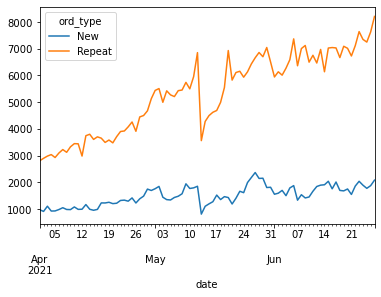

In [16]:
dataset1['date'] =pd.to_datetime(dataset1.date)
dataset1.pivot(index="date", columns="ord_type", values="orders").plot()

#### Observaion: A major drop in sales growth occurred around 13 of may 2021 as indicated  by above figure

<AxesSubplot:xlabel='date_1'>

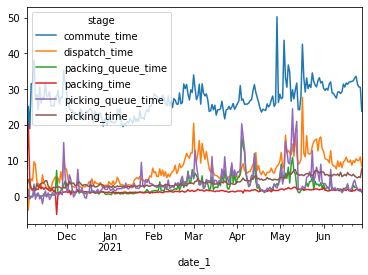

In [17]:
dataset3['date_1'] =pd.to_datetime(dataset3.date_1)
dataset3.pivot(index="date_1", columns="stage", values="avg").plot()

#### During the month of May our stage timing for different categories seem to increased correlating with the major drop in sales 

## Number of complaints reported corresponding to each month

In [34]:

dataset4_copy=dataset4.copy()
dataset4_copy['month']= dataset4['created_at'].dt.month
dataset4_copy['month'].value_counts()

5    31026
6    29409
4    16866
3     9801
2     5291
1     3000
Name: month, dtype: int64

#### Observation: The month of may recorded the highest number of complaints as compared to the rest of the months that confirms our above figure result where we pointed out the drop in sales growth during the month of May

## warehouse ids where most complaints been reported in month of may

In [85]:
left_join_frame=dataset4_copy.merge(dataset2.drop_duplicates(subset=['product_id']), how='left')

In [86]:
(left_join_frame[(left_join_frame.month == 6 )])['warehouse_id'].value_counts()

38.0     3261
37.0     2195
1.0      1912
69.0     1605
236.0    1573
39.0     1560
67.0     1557
169.0    1468
235.0    1370
238.0    1350
136.0    1200
68.0     1174
35.0     1161
240.0     898
239.0     820
135.0     657
243.0     125
242.0     119
245.0      58
Name: warehouse_id, dtype: int64

#### Observation: warehouses with id 38.0, 37.0, and 1.0 seem to be getting the most number of complaits investigating these may lead us to the major drivers behind this drop in growth 

## First three warehouses where most complaints been reported all located in karachi

In [64]:
dataset2.loc[dataset2['warehouse_id'] == 38.0, 'city'][0:1]

[1557    Karachi
 Name: city, dtype: object]

In [39]:
dataset2.loc[dataset2['warehouse_id'] == 69.0, 'city'][0:1]

3186    Karachi
Name: city, dtype: object

In [40]:
dataset2.loc[dataset2['warehouse_id'] == 37.0, 'city'][0:1]

1120    Karachi
Name: city, dtype: object

## Categories of complaints and their relative percentages 

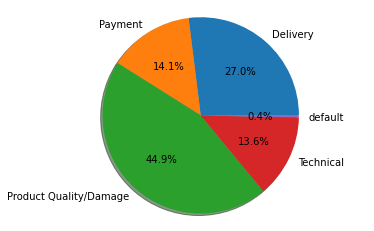

In [41]:
labels = dataset4['complaint_reason_title'].astype('category').cat.categories.tolist()
counts = dataset4['complaint_reason_title'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()


 ### Observation: Product Quality / damage is the most reported complaint

In [35]:
# most problematic rodects id
dataset4['product_id'].value_counts()


2475.0     1150
2485.0      546
2484.0      469
2476.0      443
2483.0      389
           ... 
6464.0        1
10468.0       1
8739.0        1
3363.0        1
5587.0        1
Name: product_id, Length: 5206, dtype: int64

## Average of hours_out_of_stock for products in each city

In [67]:
dataset2.groupby('city', as_index=False)['hours_out_of_stock'].mean()

,city,hours_out_of_stock
0,Islamabad,8.938942
1,Karachi,9.077070
2,Lahore,10.235190


## Average of daily_sales_adj for products in each city

In [68]:
dataset2.groupby('city', as_index=False)['daily_sales_adj'].mean()

,city,daily_sales_adj
0,Islamabad,3.419336
1,Karachi,4.977935
2,Lahore,3.275516


### Conclusion:
A major drop in sales growth occurred around 13 May 2021, during the same time in the month of May our stage timing for different categories seem to increased correlating with the major drop in sales growth moreover further investigation of complaints also confirmed that the most complaints were indeed reported in the month of May 2021 perfectly correlating with a drop in sales growth around the same time.
The warehouse that recorded the most complaints were all in Karachi, with most complaints belonging to issues regarding either Product Quality or damage